In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [2]:
# Problem Set 1 (lz -Effect) Numerics 2
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [4]:
# Pauli Matrices
x = sigmax() 
y = sigmay()
z = sigmaz()

# Coefficients for Hamiltonian
epsilon = 1
delta = 0.5

# Define Hamiltonian
Hamiltonian = -0.5*(epsilon*z + delta*x)

# Define time for integration
time_end = 4*np.pi/epsilon; # the end time
time_array = np.linspace(start = 0, stop = time_end, num = 1001) # time array
state0 = basis (2, 0) # at time = 0, we start from state = |0>

# Define array to store results
results = [[float for i in range(1)] for j in range(1001)]

In [5]:
# Find the time evolution of H with base state state0
dummy = sesolve(H = Hamiltonian, psi0 = state0, tlist = time_array, e_ops=[], args={}, 
                options=None, progress_bar=None, _safe_mode=True)
list_of_state = dummy.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99998026+0.j        ]
 [0.        +0.00628314j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99992104+0.j        ]
 [0.        +0.01256604j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99982235+0.j        ]
 [0.        +0.01884843j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99968419+0.j        ]
 [0.        +0.02513008j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99950656+0.j        ]
 [0.        +0.03141074j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99928947+0.j        ]
 [0.        +0.03769016j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99903294+0.j        ]
 [0.        +0.04396809j]], Quantum object:

In [5]:
# Find the population quantum state
for i in range (0, len(list_of_state)):
    new_Qobj = list_of_state[i].dag() # find the dagger of the state which will yield a bra state
    results[i] = (abs(new_Qobj.overlap(state0)))**2 # find the magnitude square of inner product btween state
                                                    # and 0 basis

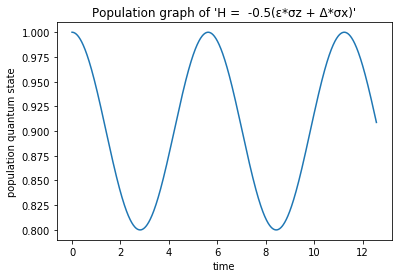

In [6]:
# Plot time vs population quantum states 
plt.plot(time_array, results)
plt.title('Population graph of \'H =  -0.5(\u03B5*\u03C3z + \u0394*\u03C3x)\'')
plt.xlabel('time')
plt.ylabel('population quantum state')
plt.show()